## Processing k6 results

In [17]:
import json
SETUP_PATH = '../common/setup.json'
f = open(SETUP_PATH)
data = json.load(f)

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import sys
sys.path.append('../common')
import utils

dir = utils.get_last_result_dir(setup_data=data)
print(dir)

for key in data["apps"]:
    fw = data["apps"][key]
    path = f'./{dir}/{fw["name"]}.csv'
    print(path)
    data["apps"][key]['df'] = pd.read_csv(path)

out/out_2023-10-29_21-31-40
./out/out_2023-10-29_21-31-40/dotnet.csv
./out/out_2023-10-29_21-31-40/django.csv
./out/out_2023-10-29_21-31-40/nestjs.csv


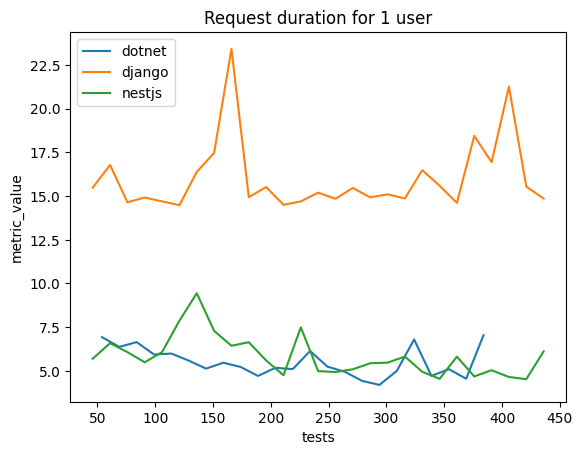

In [21]:
for key in data["apps"]:
    fw = data["apps"][key]
    df = fw['df']
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][3:]
    duration = df_1['metric_value']
    sns.lineplot(data=duration, label=f'{fw["name"]}').set(title=f'Request duration for {data["vus"]} {"users" if data["vus"] > 1 else "user"}', xlabel="tests")

Text(0.5, 1.0, 'Quantity of records for dotnet with 1 user')

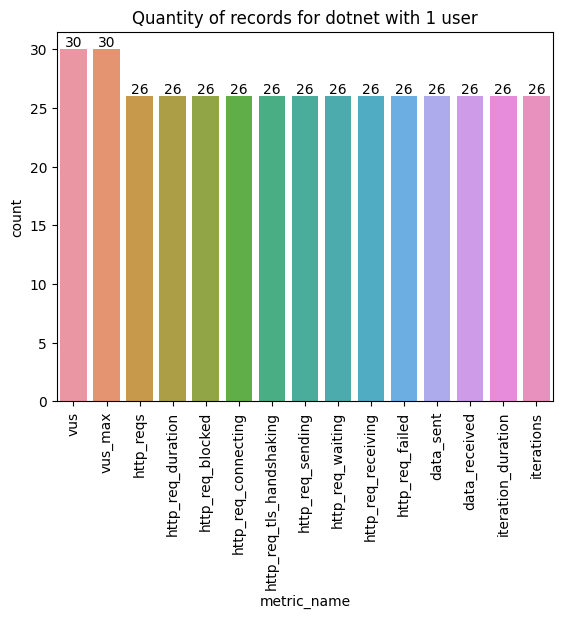

In [ ]:
index = 0
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']

chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')


Text(0.5, 1.0, 'Quantity of records for django with 1 user')

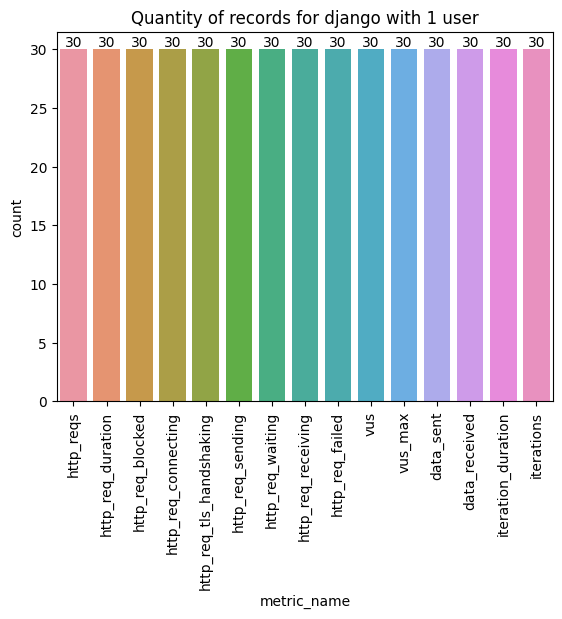

In [ ]:
index = 1
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')

Text(0.5, 1.0, 'Quantity of records for nestjs with 1 user')

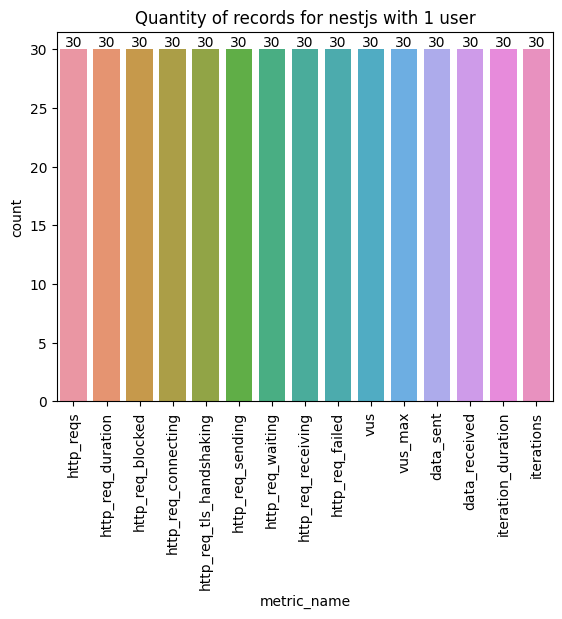

In [ ]:
index = 2
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')